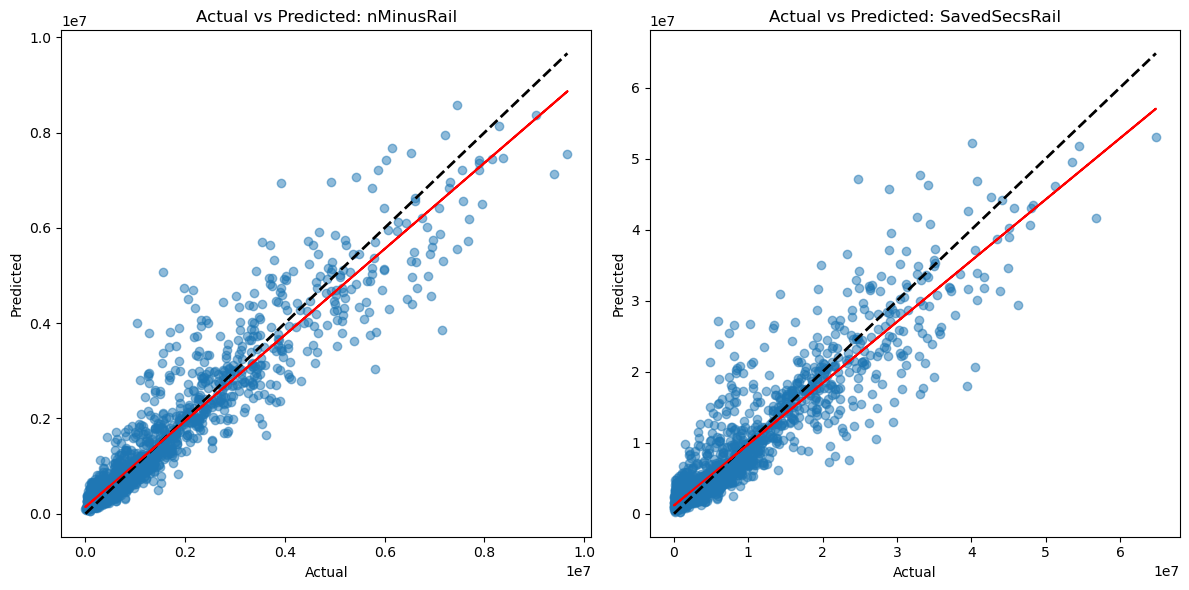

R² score for nMinusRail: 0.8957000033485077
R² score for SavedSecsRail: 0.8462485531070778


In [6]:
# Revised code to include both a simple reference line (y=x) and a model prediction trend line
# for the two target variables: nMinusRail and SavedSecsRail

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the data
data = pd.read_csv('merged.csv')  # Update with your file path

# Extracting the relevant columns
X = data[['net_i', 'net_j', 'net_secs']]

# Predicting nMinusRail
y_nMinusRail = data['nMinusRail']
X_train_nMinusRail, X_test_nMinusRail, y_train_nMinusRail, y_test_nMinusRail = train_test_split(
    X, y_nMinusRail, test_size=0.2, random_state=42)
rf_nMinusRail = RandomForestRegressor(random_state=42)
rf_nMinusRail.fit(X_train_nMinusRail, y_train_nMinusRail)
y_pred_nMinusRail = rf_nMinusRail.predict(X_test_nMinusRail)
r2_score_nMinusRail = r2_score(y_test_nMinusRail, y_pred_nMinusRail)

# Predicting SavedSecsRail
y_SavedSecsRail = data['savedSecsRail']  
X_train_SavedSecsRail, X_test_SavedSecsRail, y_train_SavedSecsRail, y_test_SavedSecsRail = train_test_split(
    X, y_SavedSecsRail, test_size=0.2, random_state=42)
rf_SavedSecsRail = RandomForestRegressor(random_state=42)
rf_SavedSecsRail.fit(X_train_SavedSecsRail, y_train_SavedSecsRail)
y_pred_SavedSecsRail = rf_SavedSecsRail.predict(X_test_SavedSecsRail)
r2_score_SavedSecsRail = r2_score(y_test_SavedSecsRail, y_pred_SavedSecsRail)

# Visualizing the results with both reference line and trend line
plt.figure(figsize=(12, 6))

# For nMinusRail
plt.subplot(1, 2, 1)
plt.scatter(y_test_nMinusRail, y_pred_nMinusRail, alpha=0.5)
plt.plot([y_test_nMinusRail.min(), y_test_nMinusRail.max()], 
         [y_test_nMinusRail.min(), y_test_nMinusRail.max()], 'k--', lw=2)  # Reference line y=x
# Trend line
slope, intercept, _, _, _ = linregress(y_test_nMinusRail, y_pred_nMinusRail)
plt.plot(y_test_nMinusRail, intercept + slope * y_test_nMinusRail, color='red')
plt.title('Actual vs Predicted: nMinusRail')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# For SavedSecsRail
plt.subplot(1, 2, 2)
plt.scatter(y_test_SavedSecsRail, y_pred_SavedSecsRail, alpha=0.5)
plt.plot([y_test_SavedSecsRail.min(), y_test_SavedSecsRail.max()], 
         [y_test_SavedSecsRail.min(), y_test_SavedSecsRail.max()], 'k--', lw=2)  # Reference line y=x
# Trend line
slope, intercept, _, _, _ = linregress(y_test_SavedSecsRail, y_pred_SavedSecsRail)
plt.plot(y_test_SavedSecsRail, intercept + slope * y_test_SavedSecsRail, color='red')
plt.title('Actual vs Predicted: SavedSecsRail')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

# Print R² scores
print(f"R² score for nMinusRail: {r2_score_nMinusRail}")
print(f"R² score for SavedSecsRail: {r2_score_SavedSecsRail}")